In [1]:
import ultralytics
from ultralytics import YOLO

In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 

import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  # Suppress Matplotlib warnings

In [3]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

# Just import these 2 modules

In [4]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

# YOLO 26 Classification Model

In [33]:
img = cv2.imread('images/puppies.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [35]:
model = YOLO('yolo26n-cls.pt') 
model = model.cpu()

In [38]:
target_layers = [model.model.model[-3]]

### You may get an inaccurate output at first (if it's running on GPU)


0: 224x224 Labrador_retriever 0.77, golden_retriever 0.14, kuvasz 0.04, Maltese_dog 0.01, tub 0.00, 7.6ms
Speed: 2.6ms preprocess, 7.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


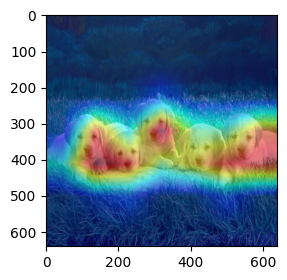

In [39]:
cam = EigenCAM(model, target_layers, task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

### Simply Re-running the cell will do the trick


0: 224x224 Labrador_retriever 0.77, golden_retriever 0.14, kuvasz 0.04, Maltese_dog 0.01, tub 0.00, 7.4ms
Speed: 2.4ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


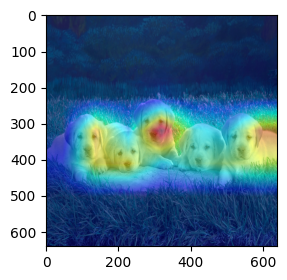

In [14]:
cam = EigenCAM(model, target_layers, task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

# YOLO 26 Object Detection Model

In [15]:
model_od = YOLO('yolo26n.pt')
model_od = model_od.cpu()
target_layers_od = [model_od.model.model[-2]]


0: 640x640 2 dogs, 1 bear, 89.1ms
Speed: 1.5ms preprocess, 89.1ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


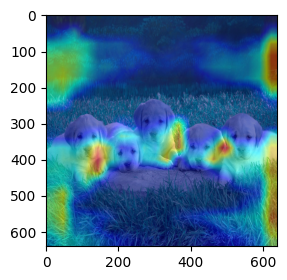

In [16]:
cam = EigenCAM(model_od, target_layers_od, task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

# YOLO 26 Segmentation Model

In [31]:
model_seg = YOLO('yolo26n-seg.pt')
model_seg = model_seg.cpu()
target_layers_seg = [model_seg.model.model[-3]]

0: 640x640 6 dogs, 90.1ms
Speed: 1.4ms preprocess, 90.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


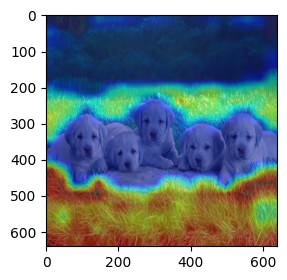

In [32]:
cam = EigenCAM(model_seg, target_layers_seg, task='seg')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()